In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import numpy as np


df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/sandwich/InstInnovation.csv")
#https://vincentarelbundock.github.io/Rdatasets/csv/sandwich/InstInnovation.csv

df.columns

##Fjerner rækken unanmed
df=df.iloc[0:,1:26]

##Fjerner missing values
df.dropna(inplace=True)

#fFjerner tobingq feature
df.drop(['tobinq'], axis=1, inplace=True)

df.to_csv(r'C:\Users\Mr. Mangabat\Desktop\FactorAnalysis\PowerBI_InnRedo.csv')
## Viser datatyper og information omkring dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 0 to 6206
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          3289 non-null   object 
 1   sales            3289 non-null   float64
 2   acompetition     3289 non-null   float64
 3   competition      3289 non-null   float64
 4   capital          3289 non-null   float64
 5   cites            3289 non-null   int64  
 6   precites         3289 non-null   float64
 7   dprecites        3289 non-null   int64  
 8   patents          3289 non-null   int64  
 9   drandd           3289 non-null   int64  
 10  randd            3289 non-null   float64
 11  employment       3289 non-null   float64
 12  sp500            3289 non-null   object 
 13  value            3289 non-null   float64
 14  institutions     3289 non-null   float64
 15  industry         3289 non-null   int64  
 16  year             3289 non-null   int64  
 17  top1          

In [2]:
## Ny navngivning af features
#df.columns=['Virksomhed','Omsætning','Market power', 'Materielle anlægsaktiver', 'Fremtidige vægtede patenter', 'GNS. forudindstillede vægtede patenter', 'Indikation på 0 patenter', 'Beviliget patenter', 'Indikation på 0 R&D aktier', 'R&D aktier', 'Ansattes i tusinde', 'SP500 noteret','Markedsværdi', 'Andel aktier institutielt ejet', 'Industrikode', 'Est.periode - årstal', 'Top 1 institution', 'Andel quasi ejet', 'Andel non-quasi ejet', 'Andel transient investors', 'Andel dedicated investors', 'Market power - industrykode']# 'Ikke SP500 noteret']



In [3]:
dt = pd.get_dummies(df, columns=["sp500"])

## Fjerner dtype = object
dt = dt.select_dtypes(exclude=['object'])
## Konverterer til float
dt = dt.astype('float64')
# Til leg i PowerBi
dt.to_csv(r'C:\Users\Mr. Mangabat\Desktop\FactorAnalysis\JBK.csv')
dt.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 0 to 6206
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sales            3289 non-null   float64
 1   acompetition     3289 non-null   float64
 2   competition      3289 non-null   float64
 3   capital          3289 non-null   float64
 4   cites            3289 non-null   float64
 5   precites         3289 non-null   float64
 6   dprecites        3289 non-null   float64
 7   patents          3289 non-null   float64
 8   drandd           3289 non-null   float64
 9   randd            3289 non-null   float64
 10  employment       3289 non-null   float64
 11  value            3289 non-null   float64
 12  institutions     3289 non-null   float64
 13  industry         3289 non-null   float64
 14  year             3289 non-null   float64
 15  top1             3289 non-null   float64
 16  quasiindexed     3289 non-null   float64
 17  nonquasiindexe

In [4]:
dt.describe()


,sales,acompetition,competition,capital,cites,precites,dprecites,patents,drandd,randd,employment,value,institutions,industry,year,top1,quasiindexed,nonquasiindexed,transient,dedicated,competition4,sp500_no,sp500_yes
count,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.00000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000
mean,3411.399253,0.856011,0.860666,2360.563647,192.662207,843.345512,0.016722,27.027972,0.120401,577.837327,15.763689,4273.749584,44.315275,3389.68349,1994.257525,7.910156,24.741133,18.414832,8.019330,10.395502,0.854537,0.700517,0.299483
std,10346.025402,0.044405,0.043427,7436.091857,1000.069494,3411.640781,0.128249,116.416639,0.325480,2556.797182,42.939707,13495.755944,20.886366,836.08704,2.296119,5.335552,13.732619,11.571549,7.115054,7.887228,0.056028,0.458101,0.458101
min,0.019000,0.558496,0.490405,0.472000,0.000000,0.001548,0.000000,0.000000,0.000000,0.000000,0.015000,2.453400,0.000000,311.00000,1991.000000,0.014568,0.020682,0.020334,0.000734,0.004160,0.465866,0.000000,0.000000
25%,150.886031,0.824022,0.840738,62.208001,0.000000,18.876071,0.000000,0.000000,0.000000,5.924377,1.100000,129.121956,27.570000,3254.00000,1992.000000,4.603074,13.417719,9.563749,2.726500,4.624413,0.828640,0.000000,0.000000
50%,544.077044,0.876284,0.870817,239.900013,10.000000,80.914616,0.000000,2.000000,0.000000,41.144474,3.370000,474.074083,45.930000,3339.00000,1994.000000,7.025208,25.058725,16.523045,6.275130,8.489766,0.865018,1.000000,0.000000
75%,2297.100079,0.883910,0.886416,1315.668025,60.000000,317.026246,0.000000,11.000000,0.000000,174.035767,11.699999,2585.062190,61.130000,3351.00000,1996.000000,9.723711,35.248470,25.458111,11.163390,14.370001,0.887071,1.000000,1.000000
max,168918.938477,0.954290,0.973153,121160.011854,23121.000000,43422.327977,1.000000,2405.000000,1.000000,43624.046875,647.000007,260326.091669,93.410000,9999.00000,1998.000000,51.542854,70.539062,63.710152,47.392906,59.646206,1.727482,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0415A2C8>,
      dtype=object)

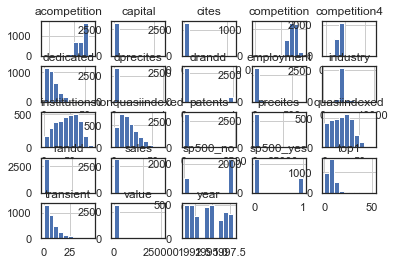

In [19]:
#dt.hist('sales', bins = 10)
#dt.hist('acompetition', bins = 10)
#dt.hist('competition', bins = 10)
#dt.hist('capital', bins = 10)
#dt.hist('cites', bins = 10)
#dt.hist('precites', bins = 10)
#dt.hist('dprecites', bins = 10)
#dt.hist('patents', bins = 10)
#dt.hist('drandd', bins = 10)
#dt.hist('randd', bins = 10)
#dt.hist('employment', bins = 10)
#dt.hist('value', bins = 10)
#dt.hist('institutions', bins = 10)
#dt.hist('industry', bins=10)
#dt.hist('year', bins = 10)
#dt.hist('top1', bins = 10)
#dt.hist('quasiindexed', bins = 10)
#dt.hist('nonquasiindexed', bins = 10)
#dt.hist('transient', bins=10)
#dt.hist('dedicated', bins= 10)
#dt.hist('competition4', bins=10)
#dt.hist('sp500_no', bins=10)
dt.hist()

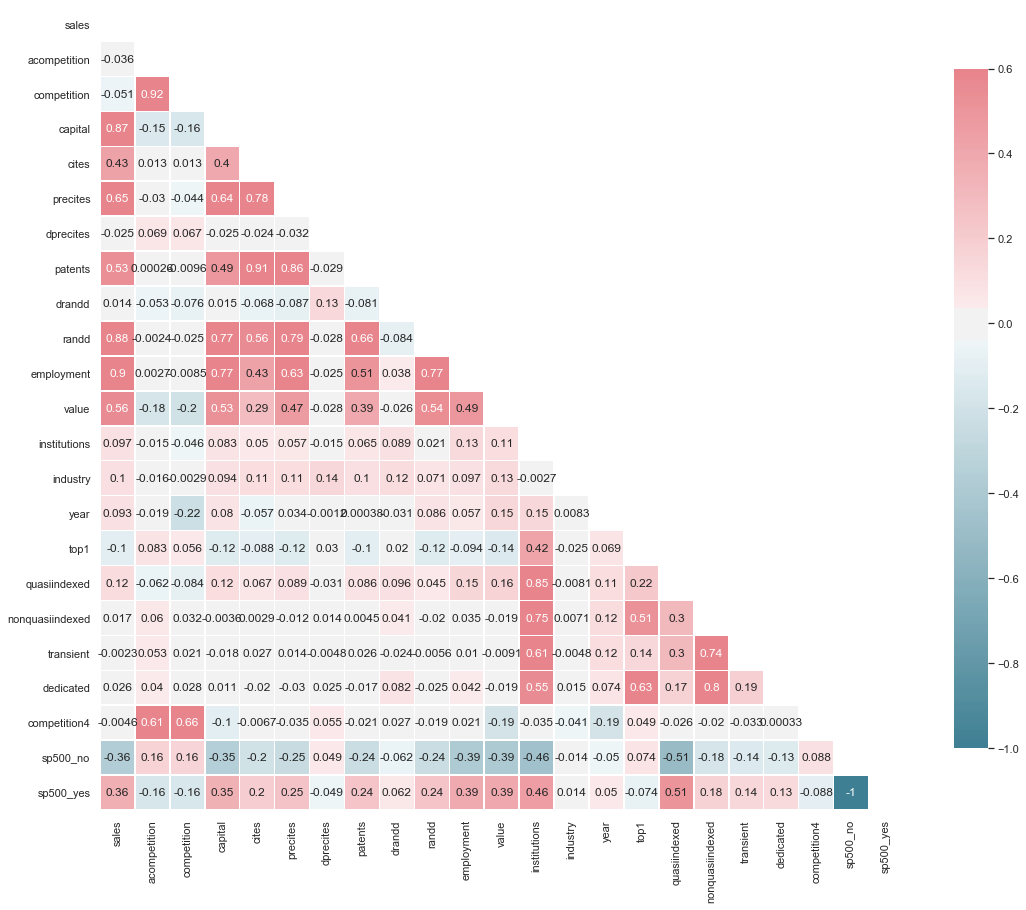

In [6]:
## Der lavers et corrolation heeatmap matrix via seaborn
sns.set(style="white")

rs = np.random.RandomState(26)

## funktionen fra sns til pd
corr = dt.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(18,25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## sns heatmap kombineret m. coroolation matrix. 
sns.heatmap(corr,  cmap=cmap, vmax=.6, mask=mask, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5}, annot=True)

In [7]:
## Bartlett's test of sphericity kontrollerer om observerede variabler  har en sammenhæng  ved at bruge 'correlation matrix overfor identity matrix. 
## Hvis p_value = 0, er data statistisk signifikant og vi kan dermed gå videre. Hvis p_value var

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value=calculate_bartlett_sphericity(dt)
chi_square_value, p_value
## Idet resultatet er 0,0, indikeres det, at de observerede korrelationer ikke er en identity matrix.(Google some more)

(286643.53070602205, 0.0)

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_model,kmo_model=calculate_kmo(dt)
kmo_model

0.6692070689885894

In [16]:
## Opretter factor analysis objektet og udarbejder factor analysis. fa tilkendegiver hvor mange faktorer man ønsker at få extracted samt tilkendegiver om man ønsker en rotation
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(23, rotation=None)

#funktion der bestemmer hvorvidt man vil extract medhenholdsvis minres, ML eller PCa.
fa.fit(dt)
fa.loadings_

## Nedenstående funktioner giver ssloading, propvariance og cumulative variance for raw extraction. 
#fa.get_factor_variance()

array([[ 8.73377637e-01, -1.71226111e-01,  9.55237608e-02,
         2.25789189e-02,  3.86419553e-01,  1.27087575e-01,
         4.05545967e-02,  2.70178353e-02, -7.48067180e-02,
         5.02039422e-02, -8.70333585e-02,  7.00000720e-02,
        -6.33646802e-03,  2.26760684e-02,  4.45613296e-02,
         1.36760842e-02, -7.51568166e-03, -2.93156327e-03,
        -4.48324583e-02,  4.38598625e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.44522988e-01, -2.52838343e-02,  9.00687582e-01,
        -2.61819543e-01,  4.73000266e-02,  6.94156648e-02,
         1.14915881e-02, -1.05947613e-01,  2.39426156e-01,
         6.07898988e-02, -3.17759179e-02, -5.76269890e-02,
         2.53794790e-02,  3.78064234e-02, -7.71042803e-02,
         2.91102128e-02,  3.22162977e-02,  1.51148564e-03,
        -3.60827984e-04,  4.69457219e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.66682192e-01, -5.86107024e-02,  9.17107612e-01,
        -3.06919258e-01,  2.3

In [17]:
## Udfra dette vides det således, at vi har 7 faktorer totalt. 
## Kontroller Eigenvalues - måler hvor meget af varians af en observeret variable en faktor fortæller os. En faktor >=1 fortæller mere varians end én enkeltstående  observeret variable. 
ev, v = fa.get_eigenvalues()
ev

## Her vises de beregnede eigenvalues.
print(v)

[ 5.93120120e+00  3.69275115e+00  2.54920183e+00  1.63448810e+00
  1.17706633e+00  9.25632353e-01  6.95734874e-01  5.38677545e-01
  4.49650080e-01  2.12413916e-01  1.43347993e-01  1.12658126e-01
  9.45265606e-02  8.68051542e-02  7.01510274e-02  3.69917555e-02
  2.90106653e-02  7.93550325e-03  3.79207974e-03  1.68399229e-03
 -5.47112826e-06 -2.49997780e-03 -3.01204932e-03]


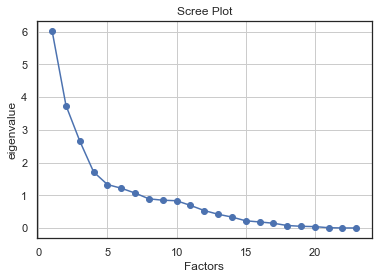

In [11]:
## Udfører scree plot v. brug af matplotlib
## Det ligner det visualiserede billeder har oprundet faktor 6 og 7.
plt.scatter(range(1,dt.shape[1]+1),ev)
plt.plot(range(1,dt.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

In [12]:
# FactorAnalyzer(6, rotation="")
## >= 0,3 afvises
fa = FactorAnalyzer(7, rotation="varimax")
fa.fit(dt)
fa.loadings_ ## Visualiser dette m. heatmap -- loading på en ting er godt, flere identiske er ringe. 

array([[ 9.84218953e-01,  9.78196020e-03, -1.58765410e-02,
         1.17622993e-01,  6.52470137e-02,  1.93763943e-02,
         3.48982136e-02],
       [-2.40037269e-02,  8.91017583e-01,  2.43906897e-02,
        -8.29472938e-02,  2.34005383e-02,  8.01592054e-02,
         1.23457319e-03],
       [-5.38429235e-02,  9.99158822e-01,  4.16681706e-03,
        -4.08382973e-02,  3.81162811e-02,  4.47724253e-02,
        -3.37689158e-02],
       [ 8.55454375e-01, -1.17094423e-01, -2.75274756e-02,
         1.32539602e-01,  1.03183037e-01, -2.42761847e-03,
         2.74747234e-02],
       [ 3.57608598e-01,  1.24278552e-02, -1.43350410e-02,
         7.82033999e-02,  8.49231084e-01, -9.38711660e-03,
         2.22473268e-02],
       [ 6.42179486e-01, -2.98621368e-02, -4.57158278e-02,
         6.16960900e-02,  6.49716370e-01,  9.09270181e-03,
         3.30234762e-02],
       [-1.06296503e-02,  6.74182804e-02,  3.88362622e-02,
        -3.74282630e-02, -2.71760034e-02, -1.67744744e-02,
        -1.1635818

In [13]:
columns = []
for i in dt.columns:
    columns.append(i)
print(columns)

facorr = fa.loadings_

['sales', 'acompetition', 'competition', 'capital', 'cites', 'precites', 'dprecites', 'patents', 'drandd', 'randd', 'employment', 'value', 'institutions', 'industry', 'year', 'top1', 'quasiindexed', 'nonquasiindexed', 'transient', 'dedicated', 'competition4', 'sp500_no', 'sp500_yes']


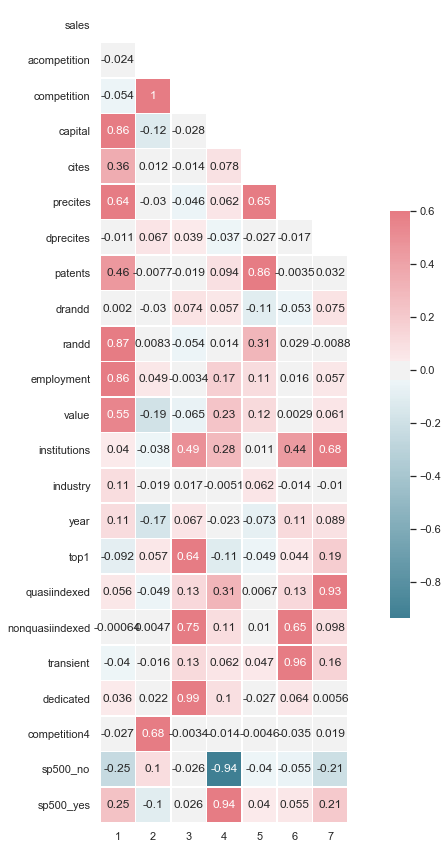

In [14]:
## Det visualiseres hvordan de enkelte variabler har indflydelse til resultatet af faktor analysen
sns.set(style="white")

ts = np.random.RandomState(26)

## funktionen fra sns til pd
##corr = dt.corr()

mask = np.triu(np.ones_like(facorr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## sns heatmap kombineret m. coroolation matrix. 
sns.heatmap(facorr,  cmap=cmap, vmax=.6, mask=mask, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5}, annot=True, yticklabels=columns, xticklabels='1234567')

In [15]:
## Funktioner der henter og udregner faktor variansen for hver faktor. 
fa.get_factor_variance()

## SS Loadings 1, 2, 3, 4, 5, 
## Proportion variance 1, 2, 3, 4, 5, 
## cumulative variance 1, 2, 3, 4, 5, 

## Fordele - Undersøger store datasets og finder korrelerende sammenhænge via 

## liste over faktorer og dens tilhørende variabler = Lyder de ens? + transformer colonner ,, explorativ

(array([4.41545315, 2.37541018, 2.2509485 , 2.1192444 , 2.04751227,
        1.59562996, 1.50946581]),
 array([0.19197622, 0.1032787 , 0.09786733, 0.09214106, 0.08902227,
        0.06937522, 0.06562895]),
 array([0.19197622, 0.29525493, 0.39312225, 0.48526331, 0.57428559,
        0.6436608 , 0.70928975]))